<a href="https://colab.research.google.com/github/Edvandrodf/Data-Science/blob/main/Regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utilizando Análise de Regressão Simples em Machine Learning**

É conhecido que a Análise de Regressão é a técnicas que a(o) cientista de dados costuma ter contato no começo dos seus estudos, quando aprende a implementar um modelo de Regressão Linear Simples.

O objetivo da análise de regressão simples é explorar o relacionamento existente entre duas ou mais variáveis, entendendo o relacionamento entre as mesmas , visando obter informações sobre uma delas a apartir dos valores conhecidos das outras, sendo representado por uma equação matemática

*Exemplificando:*  
Caso uma imobiliária queira estimar o preço (w) de venda de um imóvel com área (x),quantidade de cômodos (y) e uma determinda região (z).   
  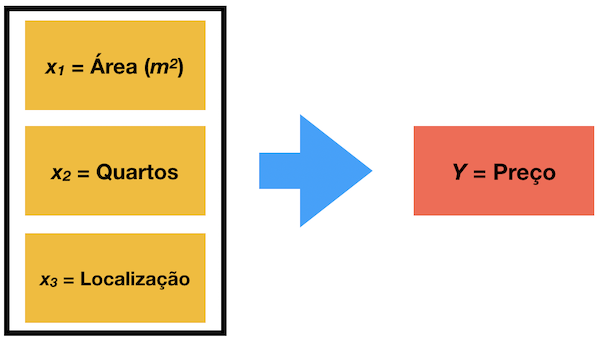

**Importante entender a diferença entre *relação determinística* e *relação não
determinística***

A relação determinística é aquela que se comporta da mesma maneira em diferentes execuções, dadas as mesmas entradas.Já a relação não determinístico seria aquela que pode se comportar de forma diferente na mesma situação. 

*Exemplificando*  
> **Relação determínistica** é quando queremos saber a distância percorrida por um carro, mantendo velocidade constante  ao longo de  segundos. Nesse exemplo, sabemos que a distância percorrida será , pois as variáveis estão relacionadas deterministicamente.

> **Não determinístico** é quando queremos saber o tamanho (t) do vocabulário de uma criança com a idade(x).



In [2]:
# importar pacotes necessários
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

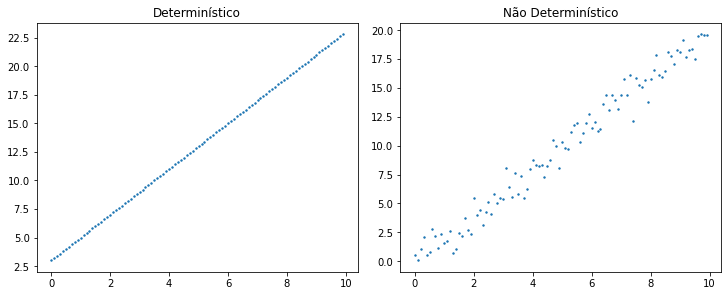

In [3]:
# exemplo de plots determinísticos
np.random.seed(42)
det_x = np.arange(0,10,0.1)
det_y = 2 * det_x + 3

# exemplo de plots não determinísticos
non_det_x = np.arange(0, 10, 0.1)
non_det_y = 2 * non_det_x + np.random.normal(size=100)

# plotar determinísticos vs. não determinísticos
fig, axs = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

axs[0].scatter(det_x, det_y, s=2)
axs[0].set_title("Determinístico")

axs[1].scatter(non_det_x, non_det_y, s=2)
axs[1].set_title("Não Determinístico")

plt.show()

Veja a diferença, que apesar dos dois gráficos estarem mostrando pontos que se espalham sobre uma “reta virtual”, um deles não segue um padrão exato, determinístico.   
Parece que há algum tipo de aleatoriedade envolvida.
Nos modelos de Regressão Linear que em Machine Learning, não temos uma relação perfeita entre as variáveis, pois as observações do dataset não cabem exatamente em uma reta.

Isso significa que temos um modelo probabilístico, que captura a aleatoriedade que é inerente de qualquer processo do mundo real.

Pense, você consegue traçar uma reta pegando todos os pontos no gráfico da esquerda? E consegue traçar uma reta pegando todos os pontos no gráfico da direita?  
Voltando para aquele exemplo de vender sua casa, basta imaginar que seu vizinho tem uma casa do mesmo tamanho, mesmo número de quartos, mesma localização, porém elas dificilmente teriam o mesmo preço exato.


**Aplicando o modelo de regressão linear simples**

Usamos a fórmula $y=\beta_0 + \beta_1x$ + $e$ ,  onde   $\beta_0$ representa a inclinação da reta, $\beta_1$ o intercepto e a variável aleatória *$e$* o erro , para resentar a relação entre uma variável dependente ($y$) e uma variável independente ($x$).  
Vamos considerar o *E* igual a zero para simplificar, ficando $y=\beta_0 + \beta_1x$

A grande questão é , *quais devem ser os valores de $\beta_0$ e $\beta_1$ para que o modelo forneça boas estimativas?*

De acordo com (DEVORE, 2014), um método usado para verificar se uma reta oferece um bom ajuste aos dados é o Método dos Mínimos Quadrados.  
Trata-se de um método de otimização matemático para encontrar o melhor ajuste para um conjunto de dados de forma a minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados registrados

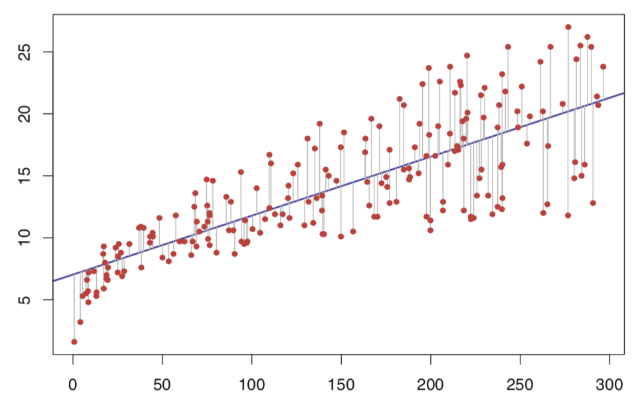

# Implementando Regressão Linear com Python
Para ver na prática uma aplicação simples e direta da Regressão Linear, vamos usar as variáveis que plotamos lá em cima, non_det_x e non_det_y.

Vamos ignorar completamente as etapas de split entre datasets de treino e teste ou qualquer outro tipo de etapa. O objetivo é apenas encontrar uma reta com um fit ideal aos nossos pontos.

In [4]:
# importar os pacotes necessários
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# criar modelo linear e otimizar
lm_model = LinearRegression()
lm_model.fit(non_det_x.reshape(-1,1), non_det_y)
# extrair coeficientes
slope = lm_model.coef_
intercept = lm_model.intercept_

Como temos apenas uma variável, nosso x é um vetor (1 dimensão).

Após minimizar a função custo e encontrar o melhor fit os parâmetros da equação da reta que buscamos estarão armazenados como atributos de lm_model, onde $\beta_0 = \text{intercept_}$ e $\beta_1 = \text{coef_}$.

Imprimindo esses parâmetros a gente vê quais valores numéricos melhor representam nossa reta para o modelo de Regressão Linear:

In [5]:
# imprimir os valores encontrados para os parâmetros
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	-0.17281285407737457
b1: 	2.0139325932693497


E agora vamos plotar a reta, com os valores de parâmetros obtidos, sobrepondo ela aos pontos e ver como essa solução parece plausível visualmente.

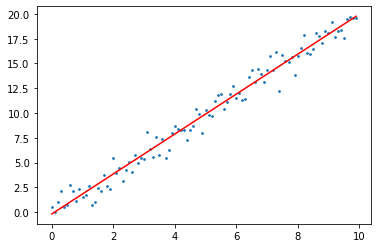

In [6]:
# plotar pontos e retas com parâmetros otimizados
plt.scatter(non_det_x, non_det_y, s=3)
plt.plot(non_det_x, (non_det_x * slope + intercept), color='r')
plt.show()

E é isso! Essa solução parece, de fato, atender ao nosso problema.

Agora você sabe não apenas implementar uma Regressão Linear, que é feito com pouquíssimas linhas de código, mas consegue entender a lógica por trás do código 🙂

# **Resumo**
Agora você consegue entender o funcionamento básico de um modelo de Regressão Linear, observando tanto visualmente (como a reta vai “melhorando” a cada iteração) quanto absorvendo conceitos (com a matemática que foi exposta).

Este artigo foi muito mais teórico que aplicação de técnicas de Data Science ou Machine Learning, e tudo isso propositalmente. Ao limitar para uma variável, conseguimos realizar os plots em 2 dimensões  e acompanhar mais facilmente tudo.

Obviamente, todo essa teoria pode ser extrapolada para problemas mais complexos envolvendo múltiplas variáveis. A lógica é a mesma!